# First steps in Data Science

Does money make people happier? Simple version without data splitting.

## Data preparation

In [5]:
import pandas as pd

# Load the data from GitHub
LINK = "https://raw.githubusercontent.com/kirenz/datasets/master/oecd_gdp.csv"
df = pd.read_csv(LINK)

In [6]:
df.head()

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            29 non-null     object 
 1   GDP per capita     29 non-null     float64
 2   Life satisfaction  29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 824.0+ bytes


In [8]:
# Change column names 
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,country,gdp_per_capita,life_satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


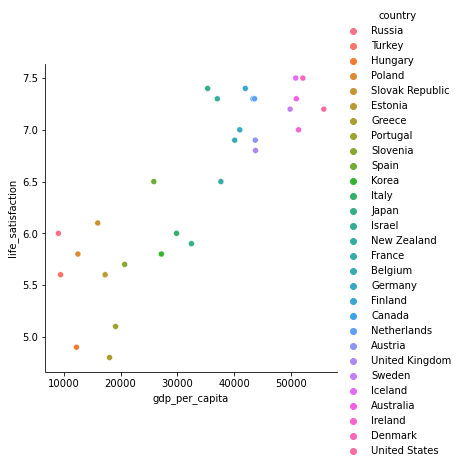

In [9]:
%matplotlib inline
import seaborn as sns

# Visualize the data
sns.relplot(x="gdp_per_capita", y='life_satisfaction', hue='country', data=df);

# Simple linear regression model

In [10]:
import statsmodels.formula.api as smf

# Estimate the model 
lm = smf.ols(formula ='life_satisfaction ~ gdp_per_capita', data=df).fit()


In [11]:
# Model coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      life_satisfaction   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     74.67
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.95e-09
Time:                        16:53:19   Log-Likelihood:                -16.345
No. Observations:                  29   AIC:                             36.69
Df Residuals:                      27   BIC:                             39.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8531      0.207     23.481      0.000       4.429       5.277
gdp_per_capita  4.912e-05   5.68e-06      8.641      0.000    3.75e-05    6.08e-05
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.486
Skew:                          -0.094   Prob(JB):                        0.784
Kurtosis:                       2.394   Cond. No.                     9.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

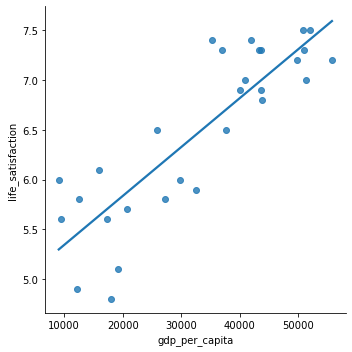

In [16]:
# Plot regression line 
sns.lmplot(data=df, x="gdp_per_capita", y="life_satisfaction", ci=False);

In [17]:
# Add the regression predictions (as "pred") to our DataFrame
df['y_pred'] = lm.predict(df.gdp_per_capita)

In [18]:
from statsmodels.tools.eval_measures import mse, rmse

# Performance measures

# MSE
mse(df['life_satisfaction'], df['y_pred'])

0.18075033705835147

In [19]:
# RMSE
rmse(df['life_satisfaction'], df['y_pred'])

0.42514742979153886